In [20]:
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 读取数据
with open('data.json', 'r') as f:
    data = json.load(f)

# 转换为DataFrame
rows = []
for country, entries in data.items():
    for entry in entries:
        row = {
            'Country': country,
            'Year': entry['Feats'][-1],  # 预测年份是否是主办方（第19个特征）
            **{f'Feat_{i}': entry['Feats'][i] for i in range(18)},  # 前18个特征
            'Label': entry['label'][3]
        }
        rows.append(row)
df = pd.DataFrame(rows)

,Country,Year,Feat_0,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,...,Feat_9,Feat_10,Feat_11,Feat_12,Feat_13,Feat_14,Feat_15,Feat_16,Feat_17,Label
0,ARG,0,1,3,2,6,109,0,3,3,...,7,98,0,3,1,0,4,47,0,7
1,ARG,0,3,3,1,7,295,0,1,2,...,5,174,0,0,1,1,2,44,0,1
2,ARG,0,1,2,2,5,174,0,0,1,...,2,44,0,0,1,1,2,116,0,2
3,ARG,0,0,1,1,2,44,0,0,1,...,2,116,0,0,1,0,1,148,0,1
4,ARG,0,0,1,1,2,116,0,0,1,...,1,148,0,0,0,2,2,132,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,ZAF,0,0,2,0,2,141,0,3,1,...,5,111,0,0,2,3,5,161,0,1
590,ZAF,0,3,1,1,5,111,0,0,2,...,5,161,0,1,3,2,6,128,0,6
591,ZAF,0,0,2,3,5,161,0,1,3,...,6,128,0,0,1,0,1,179,0,10
592,ZAF,0,1,3,2,6,128,0,0,1,...,1,179,0,4,1,1,6,145,0,3


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
preprocessor = ColumnTransformer(
    transformers=[
        ('country', OneHotEncoder(handle_unknown='ignore'), ['Country']),  # 国家编码
        ('num', StandardScaler(), [f'Feat_{i}' for i in range(18)]),        # 数值特征标准化
        ('host_year', 'passthrough', ['Year'])                               # 保留预测年份主办方状态
    ])

# 定义模型管道
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(cv=5, max_iter=10000))
])
# 划分数据集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
# 使用训练集训练模型
model.fit(X_train, y_train)

# 使用测试集评估模型
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 153.22821997727556


In [15]:
X_train

,Country,Year,Feat_0,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10,Feat_11,Feat_12,Feat_13,Feat_14,Feat_15,Feat_16,Feat_17
155,DEU,0,6,5,2,13,94,0,4,3,2,9,103,0,4,5,6,15,55,0
550,TWN,0,0,1,4,5,75,0,2,2,1,5,104,0,1,1,2,4,92,0
132,CHE,0,2,1,4,7,116,0,2,2,0,4,126,0,3,2,2,7,152,0
450,NZL,0,3,0,2,5,88,0,1,0,2,3,65,0,1,1,1,3,112,0
287,HUN,0,9,10,7,26,197,0,6,8,7,21,312,0,10,7,5,22,319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,BGR,0,10,12,13,35,281,0,3,7,6,16,236,0,3,7,5,15,181,0
106,CAN,1,0,1,0,1,140,0,1,2,1,4,194,0,1,3,1,5,291,0
270,GRC,0,0,1,1,2,73,0,0,0,1,1,72,0,2,0,0,2,76,0
435,NLD,0,7,5,4,16,283,0,6,6,8,20,222,0,8,7,4,19,329,0


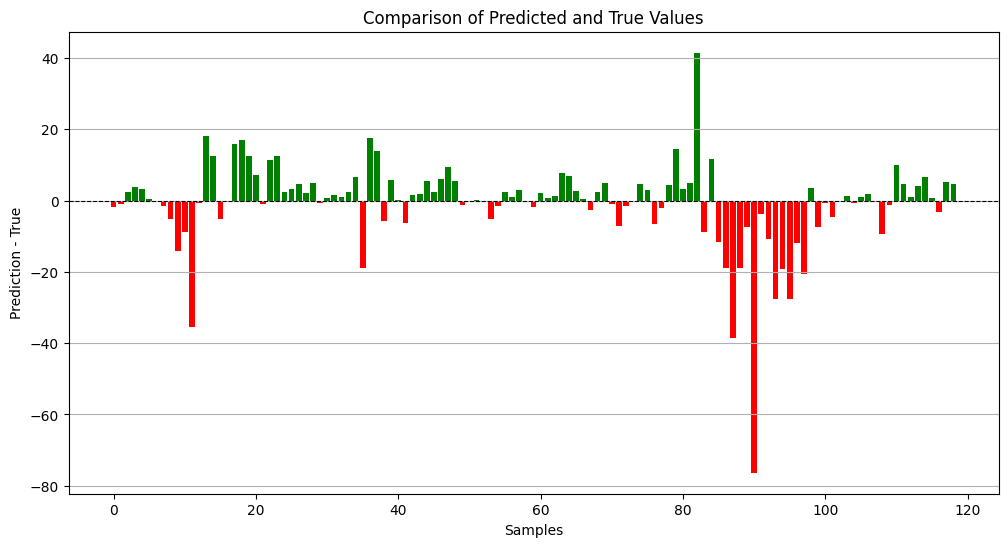

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib

# Set font to support English without warnings
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Example data (假设 y_pred 和 y_test 已经定义)
y_true = y_test
y_pred = model.predict(X_test)  # 请确保此行在你的上下文中有效

# Calculate the difference
difference = y_pred - y_true

# Set colors based on the difference
colors = ['green' if diff >= 0 else 'red' for diff in difference]

# Create figure with a specific size
plt.figure(figsize=(12, 6))  # 设置图形大小

# Create bar chart
plt.bar(range(len(difference)), difference, color=colors)

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Prediction - True')
plt.title('Comparison of Predicted and True Values')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add horizontal reference line
plt.grid(axis='y')  # 添加y轴网格
plt.show()

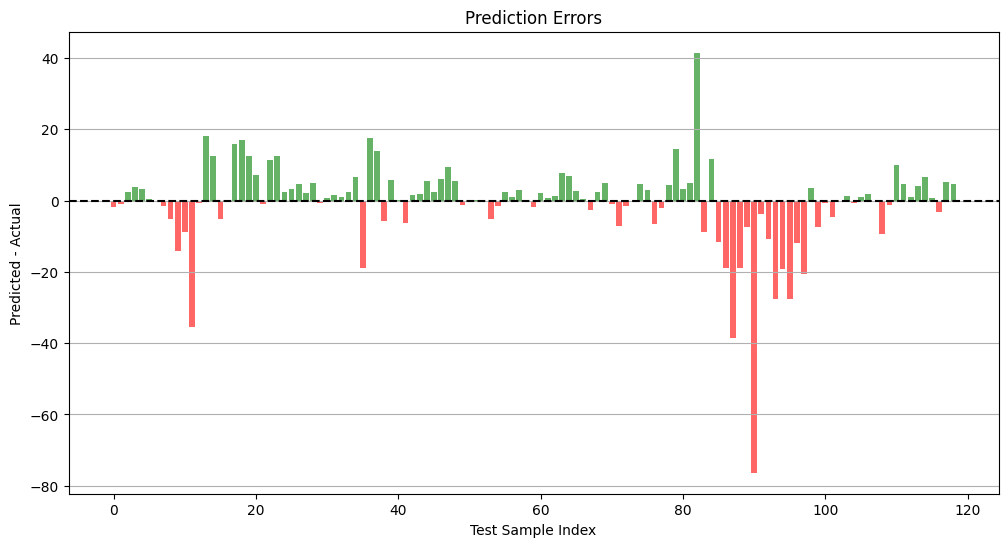

In [25]:
import matplotlib.pyplot as plt
import numpy as np
y_true = y_test
y_pred = model.predict(X_test)  # 请确保此行在你的上下文中有效
# 假设 test_error 是一个包含预测值与真实值之间差异的列表
# test_error = [误差1, 误差2, 误差3, ..., 误差n]
test_error = y_pred - y_true
# 创建颜色数组，根据误差决定颜色
colors = ['green' if error > 0 else 'red' for error in test_error]

# 绘制误差图
plt.figure(figsize=(12, 6))
plt.bar(range(len(test_error)), test_error, color=colors, alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # 添加零误差参考线
plt.title('Prediction Errors')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted - Actual')
# plt.xticks(range(len(test_error)))  # 根据误差数量设置x轴刻度
plt.grid(axis='y')  # 添加y轴网格
plt.show()

In [19]:
print(type(difference))

<class 'pandas.core.series.Series'>


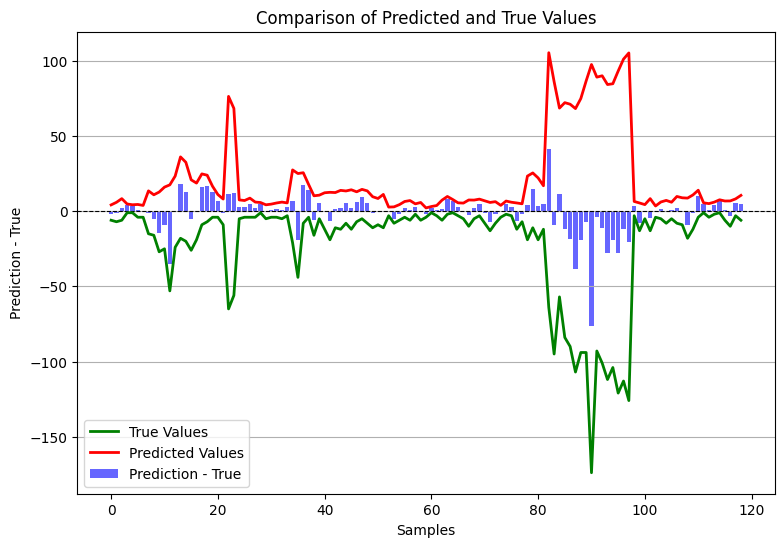

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set font to support English without warnings
# matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Example data (假设 y_pred 和 y_test 已经定义)
y_true = y_test
y_pred = model.predict(X_test)  # 请确保此行在你的上下文中有效

# Calculate the difference
difference = y_pred - y_true

# Create figure with a specific size
plt.figure(figsize=(9, 6))  # 设置图形大小

# Create bar chart with unified color
plt.bar(range(len(difference)), difference, color='blue', alpha=0.6, label='Prediction - True')

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Prediction - True')
plt.title('Comparison of Predicted and True Values')

# Add horizontal reference line
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Plot the true values and predicted values as lines
plt.plot(range(len(y_true)), -1*y_true, color='green', label='True Values', linestyle='-', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='-', linewidth=2)

# Add legends
plt.legend()

# Add grid for better readability
plt.grid(axis='y')  # 添加y轴网格
plt.show()

C:\Users\31670\AppData\Local\Temp\ipykernel_36116\2856244763.py:31: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 自动调整布局
C:\Users\31670\AppData\Local\Temp\ipykernel_36116\2856244763.py:31: UserWarning: Glyph 24038 (\N{CJK UNIFIED IDEOGRAPH-5DE6}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 自动调整布局
C:\Users\31670\AppData\Local\Temp\ipykernel_36116\2856244763.py:31: UserWarning: Glyph 20391 (\N{CJK UNIFIED IDEOGRAPH-4FA7}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 自动调整布局
C:\Users\31670\AppData\Local\Temp\ipykernel_36116\2856244763.py:31: UserWarning: Glyph 21491 (\N{CJK UNIFIED IDEOGRAPH-53F3}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 自动调整布局
C:\Users\31670\AppData\Local\Temp\ipykernel_36116\2856244763.py:31: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from font(s) DejaVu Sans.
  fig.tight_layout()  # 自动调整布局
C:\Users\31670\AppData\Local\Temp\ipykernel_3

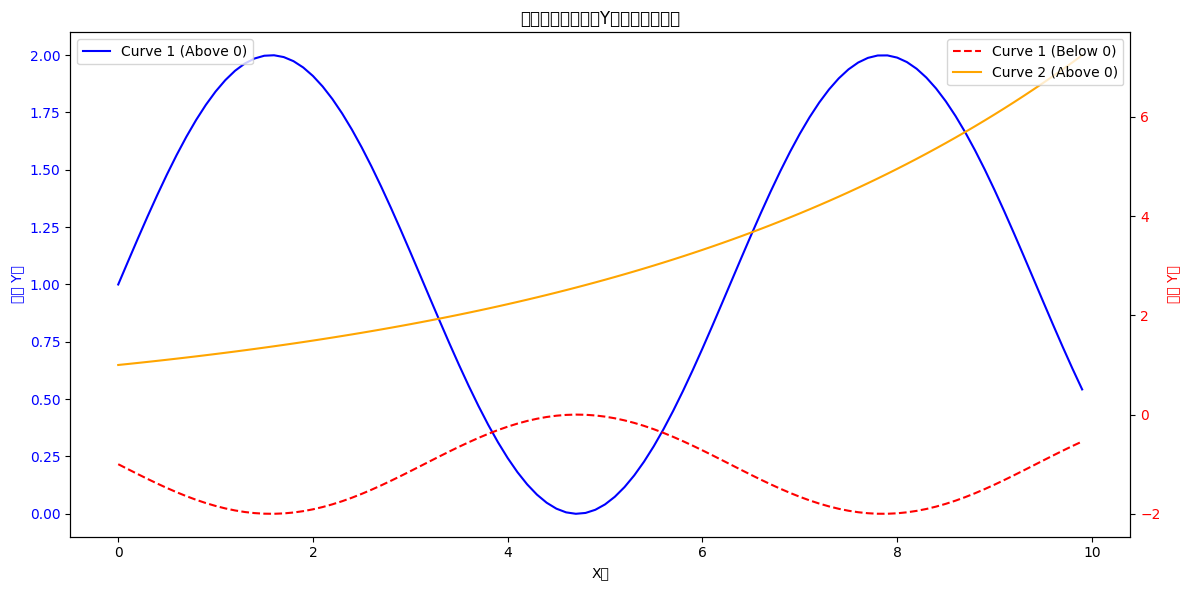

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
x = np.arange(0, 10, 0.1)

# 两条曲线的数据，均大于0
y1 = np.sin(x) + 1  # 第一条曲线，始终大于 0
y2 = np.exp(x / 5)  # 第二条曲线，也始终大于 0

# 创建图形和主坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制左侧y轴的数据
ax1.plot(x, y1, color='blue', label='Curve 1 (Above 0)')
ax1.set_xlabel('X轴')
ax1.set_ylabel('左侧 Y轴', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建右侧y轴
ax2 = ax1.twinx()  # 实现双y轴

# 绘制右侧y轴的数据
ax2.plot(x, -y1, color='red', label='Curve 1 (Below 0)', linestyle='--')  # 将y1乘以-1
ax2.plot(x, y2, color='orange', label='Curve 2 (Above 0)', linestyle='-')  # 第二条曲线
ax2.set_ylabel('右侧 Y轴', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 添加标题和图例
plt.title('复合图示例：右侧Y轴显示两条曲线')
fig.tight_layout()  # 自动调整布局

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()